In [129]:
import pandas as pd

In [130]:
df = pd.read_csv('kanye_lyrics.csv', encoding = 'latin-1')

In [131]:
pd.options.display.max_colwidth = 5000

In [132]:
df.head()

,album,song,lyric,year
0,College Dropout,Intro,". . . . Kanye, can I talk to you for a minute?. . Me and the other faculty members was wonderin could you do a lil som.... . Somethin beautiful. . Somethin that the kids is gon love when they hear it. . Thas gon make them start jumpin up and down and sharin candy an' stuff. . Think you could probably do somethin for the kids for graduation to sing?.",2004
1,College Dropout,We Don't Care,". . . . . . And all my people thats drug dealin jus to get by stack ya money till it gets sky high. . We wasnt supposed to make it past 25 but the jokes on you we still alive. . Throw your hands up in the sky and say we don't care what people say. . If this is your first time hearing this . . You are about to experience something cold man. . We never had nothing handed took nothing for granted. . Took nothing from no man, man i'm my own man. . But as a shorty i looked up to the dopeman. . Only adult man i knew that wasnt a broke man. . Flickin starter coats man, Man you ount no man. . We don't care what people say. . This is for my niggas outside all winter. . Cuz this summer they aint finna to say next summer im finna. . Sittin in the hood like community colleges. . This dope money here is Lil Treys scholarship. . Cause aint no to tuition for havin no ambition. . And aint no loans for sittin your ass at home. . So we forced to sell crack rap and get a job. . You gotta do something man your ass is grown. . Drug dealin jus to get by stack ya money till it gets sky high. . Kids Sing Kids Sing. . We wasnt supposed to make it past 25 but the jokes on you we still alive. . Throw your hands up in the sky and say we don't care what people say. . The second verse is for my dogs working 9 to 5. . That still hustle cause a nigga can't shine off $6.55. . And everybody selling make-up, Jacobs. . And bootleg tapes just to get they cake up. . We put shit on layaway then come back. . We claim other people kids on our income tax. . We take that money cop work than push packs to get paid. . And we don't care what people say. . Momma say she wanna move south . . Scratchin lottery tickets Eyes on a new house. . Around the same time Doe ran up in dudes house . . Couldnt get a job. . So since he couldnt get work he figured hed take work. . The drug game bolemic its hard to get weight. . So niggas money is homo its hard to get straight. . So we gon keep baking to the day we get cake.. . And we dont care what people say . . My Niggas . . Drug dealin jus to get by stack ya money till it gets sky high. . Kids Sing Kids Sing. . We wasnt supposed to make it past 25 but the jokes on you we still alive. . Throw your hands up in the sky and say we don't care what people say. . You know the kids gonna act a fool. . When you stop the programs for after school. . And they DCFS them some of them dislecsic. . They favorite 50 Cent song's 12 Questions. . We scream, rock, blows, weed park . . so now we smart. . We aint retards the way teachers thought. . Hold up hold fast we make mo'cash. . Now tell my momma i belong in the slow class . . It's bad enough we on welfare. . You trying to put me on the school bus with the space for the wheel chair. . Im trying to get the car with the chromy wheels here. . You tryin to cut our lights like we dont live here. . Look at whats handed us our fatheres abandoned us. . When we get the hammers gone and call the ambulance. . Sometimes i feel no one in this world understands us. . But we dont care what people say. . My Niggas. . drug dealin jus to get by stack ya money till it gets sky high. . Kids Sing Kids Sing. . We wasnt supposed to make it past 25 but the jokes on you we still alive. . Throw your hands up in the sky and say we don't care what people say.",2004
2,College Dropout,Graduation Day,". . . . What in the fuck was that Kanye. . I told you to do some shit for the kids. . You can give me your muthafucking graduation ticket right now. . You will not walk across that stage, you won't slide

In [133]:
songs = df

In [134]:
len(songs)

141

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [136]:
import nltk
from nltk.corpus import stopwords

In [137]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cbart\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [148]:
stop_words = stopwords.words('english')

In [149]:
stop_words.extend(['man', 'hey', 'uh', 'it', "it's", "like",'oh', 'gonna', 'yo', 'thing', 'huh', 'yeah', 'ya'])

In [150]:
vectorizer = TfidfVectorizer(stop_words =  stop_words, min_df = 0.1)

In [151]:
tfidf = vectorizer.fit_transform(songs['lyric'])

In [152]:
 from sklearn.decomposition import NMF

In [153]:
nmf = NMF(n_components = 6)

In [154]:
topic_values = nmf.fit_transform(tfidf)

In [155]:
for topic_num, topic in enumerate(nmf.components_):
    message = "Topic #{}: ".format(topic_num + 1)
    message += " ".join([vectorizer.get_feature_names()[i] for i in topic.argsort()[:-11 :-1]])
    print(message)

Topic #1: nigga shit niggas black fuck bitch got go know bad
Topic #2: love ever away made never keep fly see yeezy start
Topic #3: get say good god feel money sky people nothing want
Topic #4: right need baby could stop tell got one turn night
Topic #5: broke got cars many go years remember kanye money say
Topic #6: know see lights never things let bout life take wrong


In [146]:
topic_labels = ['trapping', 'love', 'religion', 'struggle', 'memories', 'life'] 

In [158]:
df_topics = pd.DataFrame(topic_values, columns = topic_labels)
df_topics

,trapping,love,religion,struggle,memories,life
0,0.000000,0.109067,0.026051,0.103824,0.015657,0.000000
1,0.002153,0.000000,0.439746,0.000000,0.019995,0.000000
2,0.100533,0.000000,0.195317,0.077988,0.000000,0.006300
3,0.109969,0.006077,0.183379,0.056355,0.010940,0.000000
4,0.000000,0.270581,0.000000,0.000000,0.000000,0.000000
5,0.053357,0.150426,0.157815,0.094724,0.014100,0.000000
6,0.016225,0.055244,0.212290,0.048642,0.000000,0.006068
7,0.092781,0.066547,0.289512,0.111941,0.000000,0.047871
8,0.153899,0.033775,0.212478,0.124379,0.018444,0.000000
9,0.300739,0.000000,0.000000,0.016350,0.003426,0.109891


In [163]:
songs = songs.join(df_topics)

ValueError: columns overlap but no suffix specified: Index(['trapping', 'love', 'religion', 'struggle', 'memories', 'life'], dtype='object')

In [164]:
songs.head()

,album,song,lyric,year,trapping,love,religion,struggle,memories,life
0,College Dropout,Intro,". . . . Kanye, can I talk to you for a minute?. . Me and the other faculty members was wonderin could you do a lil som.... . Somethin beautiful. . Somethin that the kids is gon love when they hear it. . Thas gon make them start jumpin up and down and sharin candy an' stuff. . Think you could probably do somethin for the kids for graduation to sing?.",2004,0.000000,0.109067,0.026051,0.103824,0.015657,0.0000
1,College Dropout,We Don't Care,". . . . . . And all my people thats drug dealin jus to get by stack ya money till it gets sky high. . We wasnt supposed to make it past 25 but the jokes on you we still alive. . Throw your hands up in the sky and say we don't care what people say. . If this is your first time hearing this . . You are about to experience something cold man. . We never had nothing handed took nothing for granted. . Took nothing from no man, man i'm my own man. . But as a shorty i looked up to the dopeman. . Only adult man i knew that wasnt a broke man. . Flickin starter coats man, Man you ount no man. . We don't care what people say. . This is for my niggas outside all winter. . Cuz this summer they aint finna to say next summer im finna. . Sittin in the hood like community colleges. . This dope money here is Lil Treys scholarship. . Cause aint no to tuition for havin no ambition. . And aint no loans for sittin your ass at home. . So we forced to sell crack rap and get a job. . You gotta do something man your ass is grown. . Drug dealin jus to get by stack ya money till it gets sky high. . Kids Sing Kids Sing. . We wasnt supposed to make it past 25 but the jokes on you we still alive. . Throw your hands up in the sky and say we don't care what people say. . The second verse is for my dogs working 9 to 5. . That still hustle cause a nigga can't shine off $6.55. . And everybody selling make-up, Jacobs. . And bootleg tapes just to get they cake up. . We put shit on layaway then come back. . We claim other people kids on our income tax. . We take that money cop work than push packs to get paid. . And we don't care what people say. . Momma say she wanna move south . . Scratchin lottery tickets Eyes on a new house. . Around the same time Doe ran up in dudes house . . Couldnt get a job. . So since he couldnt get work he figured hed take work. . The drug game bolemic its hard to get weight. . So niggas money is homo its hard to get straight. . So we gon keep baking to the day we get cake.. . And we dont care what people say . . My Niggas . . Drug dealin jus to get by stack ya money till it gets sky high. . Kids Sing Kids Sing. . We wasnt supposed to make it past 25 but the jokes on you we still alive. . Throw your hands up in the sky and say we don't care what people say. . You know the kids gonna act a fool. . When you stop the programs for after school. . And they DCFS them some of them dislecsic. . They favorite 50 Cent song's 12 Questions. . We scream, rock, blows, weed park . . so now we smart. . We aint retards the way teachers thought. . Hold up hold fast we make mo'cash. . Now tell my momma i belong in the slow class . . It's bad enough we on welfare. . You trying to put me on the school bus with the space for the wheel chair. . Im trying to get the car with the chromy wheels here. . You tryin to cut our lights like we dont live here. . Look at whats handed us our fatheres abandoned us. . When we get the hammers gone and call the ambulance. . Sometimes i feel no one in this world understands us. . But we dont care what people say. . My Niggas. . drug dealin jus to get by stack ya money till it gets sky high. . Kids Sing Kids Sing. . We wasnt supposed to make it past 25 but the jokes on you we still alive. . Throw your hands up in the sky and say we don't care what people say.",2004,0.002153,0.000000,0.439746,0.000000,0.019995,0.0000
2,College Dropout,Graduation Day,". . . . What in the fuck was that Kanye. . I told you

In [168]:
songs.loc[songs['trapping'] >= 0.1, 'trapping'] = 1
songs.loc[songs['love'] >= 0.1, 'love'] = 1
songs.loc[songs['religion'] >= 0.1, 'religion'] = 1
songs.loc[songs['struggle'] >= 0.1, 'struggle'] = 1
songs.loc[songs['memories'] >= 0.1, 'memories'] = 1
songs.loc[songs['life'] >= 0.1, 'life'] = 1


In [169]:
songs.loc[songs['trapping'] <= 0.1, 'trapping'] = 0
songs.loc[songs['love'] <= 0.1, 'love'] = 0
songs.loc[songs['religion'] <= 0.1, 'religion'] = 0
songs.loc[songs['struggle'] <= 0.1, 'struggle'] = 0
songs.loc[songs['memories'] <= 0.1, 'memories'] = 0
songs.loc[songs['life'] <= 0.1, 'life'] = 0

In [170]:
songs.head()

,album,song,lyric,year,trapping,love,religion,struggle,memories,life
0,College Dropout,Intro,". . . . Kanye, can I talk to you for a minute?. . Me and the other faculty members was wonderin could you do a lil som.... . Somethin beautiful. . Somethin that the kids is gon love when they hear it. . Thas gon make them start jumpin up and down and sharin candy an' stuff. . Think you could probably do somethin for the kids for graduation to sing?.",2004,0.0,1.0,0.0,1.0,0.0,0.0
1,College Dropout,We Don't Care,". . . . . . And all my people thats drug dealin jus to get by stack ya money till it gets sky high. . We wasnt supposed to make it past 25 but the jokes on you we still alive. . Throw your hands up in the sky and say we don't care what people say. . If this is your first time hearing this . . You are about to experience something cold man. . We never had nothing handed took nothing for granted. . Took nothing from no man, man i'm my own man. . But as a shorty i looked up to the dopeman. . Only adult man i knew that wasnt a broke man. . Flickin starter coats man, Man you ount no man. . We don't care what people say. . This is for my niggas outside all winter. . Cuz this summer they aint finna to say next summer im finna. . Sittin in the hood like community colleges. . This dope money here is Lil Treys scholarship. . Cause aint no to tuition for havin no ambition. . And aint no loans for sittin your ass at home. . So we forced to sell crack rap and get a job. . You gotta do something man your ass is grown. . Drug dealin jus to get by stack ya money till it gets sky high. . Kids Sing Kids Sing. . We wasnt supposed to make it past 25 but the jokes on you we still alive. . Throw your hands up in the sky and say we don't care what people say. . The second verse is for my dogs working 9 to 5. . That still hustle cause a nigga can't shine off $6.55. . And everybody selling make-up, Jacobs. . And bootleg tapes just to get they cake up. . We put shit on layaway then come back. . We claim other people kids on our income tax. . We take that money cop work than push packs to get paid. . And we don't care what people say. . Momma say she wanna move south . . Scratchin lottery tickets Eyes on a new house. . Around the same time Doe ran up in dudes house . . Couldnt get a job. . So since he couldnt get work he figured hed take work. . The drug game bolemic its hard to get weight. . So niggas money is homo its hard to get straight. . So we gon keep baking to the day we get cake.. . And we dont care what people say . . My Niggas . . Drug dealin jus to get by stack ya money till it gets sky high. . Kids Sing Kids Sing. . We wasnt supposed to make it past 25 but the jokes on you we still alive. . Throw your hands up in the sky and say we don't care what people say. . You know the kids gonna act a fool. . When you stop the programs for after school. . And they DCFS them some of them dislecsic. . They favorite 50 Cent song's 12 Questions. . We scream, rock, blows, weed park . . so now we smart. . We aint retards the way teachers thought. . Hold up hold fast we make mo'cash. . Now tell my momma i belong in the slow class . . It's bad enough we on welfare. . You trying to put me on the school bus with the space for the wheel chair. . Im trying to get the car with the chromy wheels here. . You tryin to cut our lights like we dont live here. . Look at whats handed us our fatheres abandoned us. . When we get the hammers gone and call the ambulance. . Sometimes i feel no one in this world understands us. . But we dont care what people say. . My Niggas. . drug dealin jus to get by stack ya money till it gets sky high. . Kids Sing Kids Sing. . We wasnt supposed to make it past 25 but the jokes on you we still alive. . Throw your hands up in the sky and say we don't care what people say.",2004,0.0,0.0,1.0,0.0,0.0,0.0
2,College Dropout,Graduation Day,". . . . What in the fuck was that Kanye. . I told you to do some shit for the kids. . You can give me your mu

In [174]:
year_topics = songs.groupby('year').sum().reset_index()

In [175]:
year_topics

,year,trapping,love,religion,struggle,memories,life
0,2004,7.0,3.0,15.0,8.0,0.0,5.0
1,2005,2.0,4.0,10.0,10.0,5.0,5.0
2,2007,4.0,1.0,10.0,4.0,0.0,5.0
3,2008,0.0,5.0,2.0,4.0,0.0,5.0
4,2010,7.0,5.0,6.0,6.0,1.0,4.0
5,2011,11.0,3.0,6.0,6.0,0.0,4.0
6,2012,5.0,4.0,4.0,6.0,0.0,2.0
7,2013,7.0,1.0,2.0,5.0,0.0,1.0
8,2016,6.0,5.0,9.0,7.0,1.0,4.0


In [176]:
import matplotlib.pyplot as plt

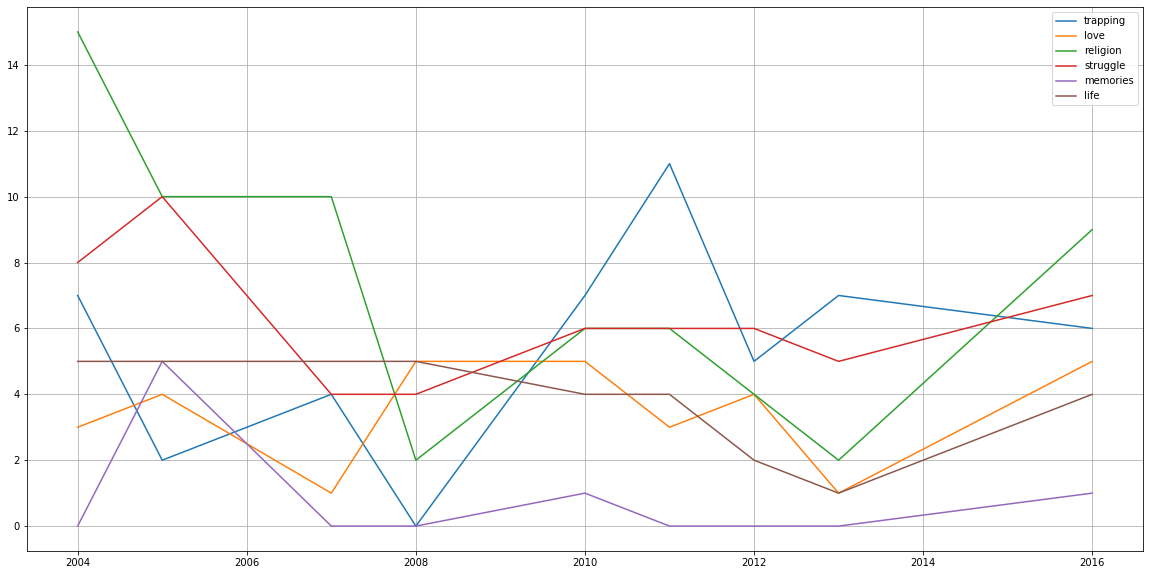

In [183]:
plt.figure(figsize = (20,10))
plt.plot(year_topics['year'], year_topics['trapping'], label = 'trapping' )
plt.plot(year_topics['year'], year_topics['love'], label = 'love' )
plt.plot(year_topics['year'], year_topics['religion'], label = 'religion' )
plt.plot(year_topics['year'], year_topics['struggle'], label = 'struggle' )
plt.plot(year_topics['year'], year_topics['memories'], label = 'memories' )
plt.plot(year_topics['year'], year_topics['life'], label = 'life' )
plt.grid()
plt.legend()